<div >
<img src = "https://raw.githubusercontent.com/jddiaze/AprendizajeNoSupervisado/main/Semana1/Files/figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [ ]:
!pip install pca

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pca import pca

In [ ]:
# Utilice este espacio para escribir el código.
df = pd.read_csv("https://raw.githubusercontent.com/jddiaze/AprendizajeNoSupervisado/main/Semana1/Files/data/lugares.csv")
df = df.set_index("Ciudad")
df.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


### 2.  Análisis descriptivo de las variables.

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables.

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.

Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [ ]:
# Utilice este espacio para escribir el código.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clima y Terreno,329.0,538.732523,120.808259,105.0,480.0,542.0,592.0,910.0
Alojamiento,329.0,8346.559271,2385.262622,5159.0,6760.0,7877.0,9015.0,23640.0
Cuidado de la salud y el medio ambiente,329.0,1185.738602,1003.002036,43.0,583.0,833.0,1445.0,7850.0
Crimen,329.0,961.054711,357.154186,308.0,707.0,947.0,1156.0,2498.0
Transporte,329.0,4210.082067,1451.179240,1145.0,3141.0,4080.0,5205.0,8625.0
Educación,329.0,2814.887538,320.792953,1701.0,2619.0,2794.0,3012.0,3781.0
Artes,329.0,3150.884498,4642.283738,52.0,778.0,1871.0,3844.0,56745.0
Recreación,329.0,1845.957447,807.888171,300.0,1316.0,1670.0,2176.0,4800.0
Economía,329.0,5525.364742,1084.468523,3045.0,4842.0,5384.0,6113.0,9980.0


In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,1.000000,0.386291,0.213303,0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
Alojamiento,0.386291,1.000000,0.453010,0.134222,0.271922,0.197934,0.448568,0.422288,0.269433
Cuidado de la salud y el medio ambiente,0.213303,0.453010,1.000000,0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crimen,0.192387,0.134222,0.304659,1.000000,0.286578,0.074416,0.389483,0.344627,0.259995
Transporte,0.079120,0.271922,0.470317,0.286578,1.000000,0.335992,0.464806,0.364716,0.059247
Educación,0.064520,0.197934,0.490234,0.074416,0.335992,1.000000,0.373279,0.077807,0.119700
Artes,0.226974,0.448568,0.865796,0.389483,0.464806,0.373279,1.000000,0.378659,0.075673
Recreación,0.213509,0.422288,0.325397,0.344627,0.364716,0.077807,0.378659,1.000000,0.173531
Economía,-0.100083,0.269433,0.069271,0.259995,0.059247,0.119700,0.075673,0.173531,1.000000


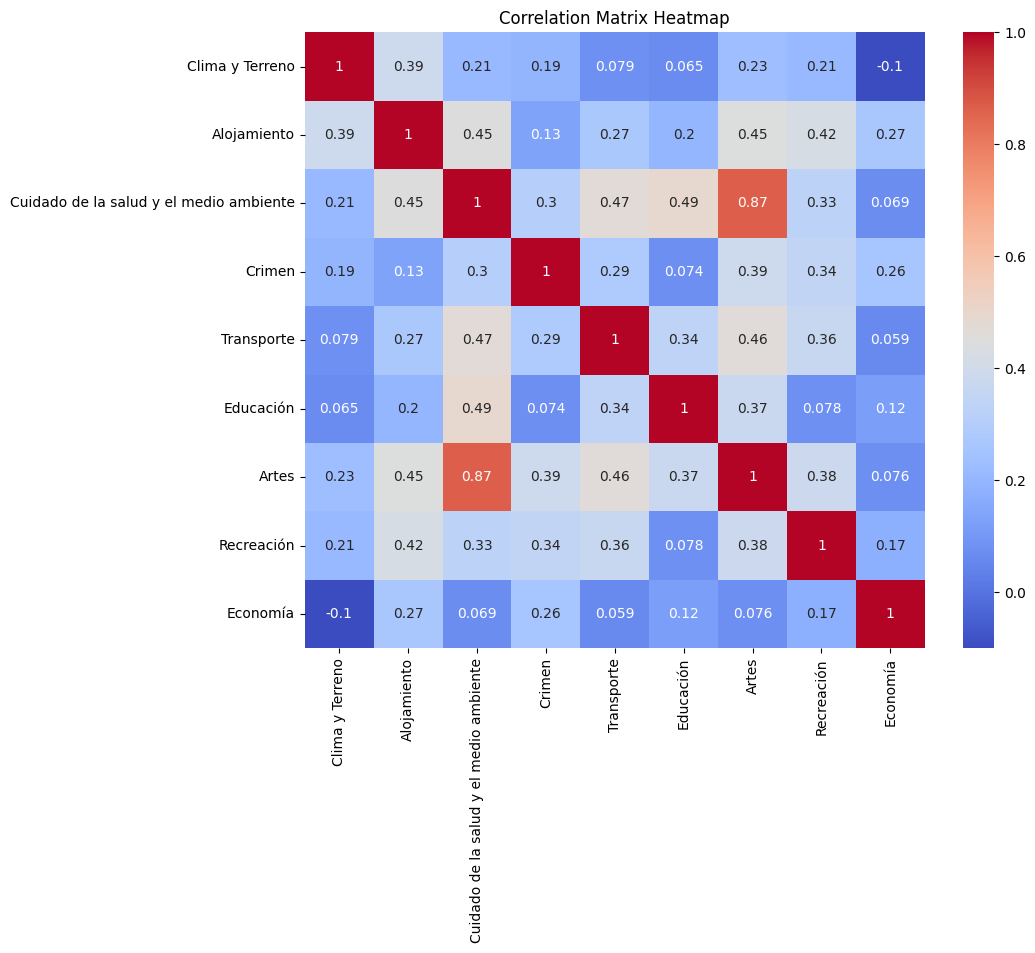

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
k = len(df.columns)
combinaciones = np.math.comb(k, 2)
combinaciones

36

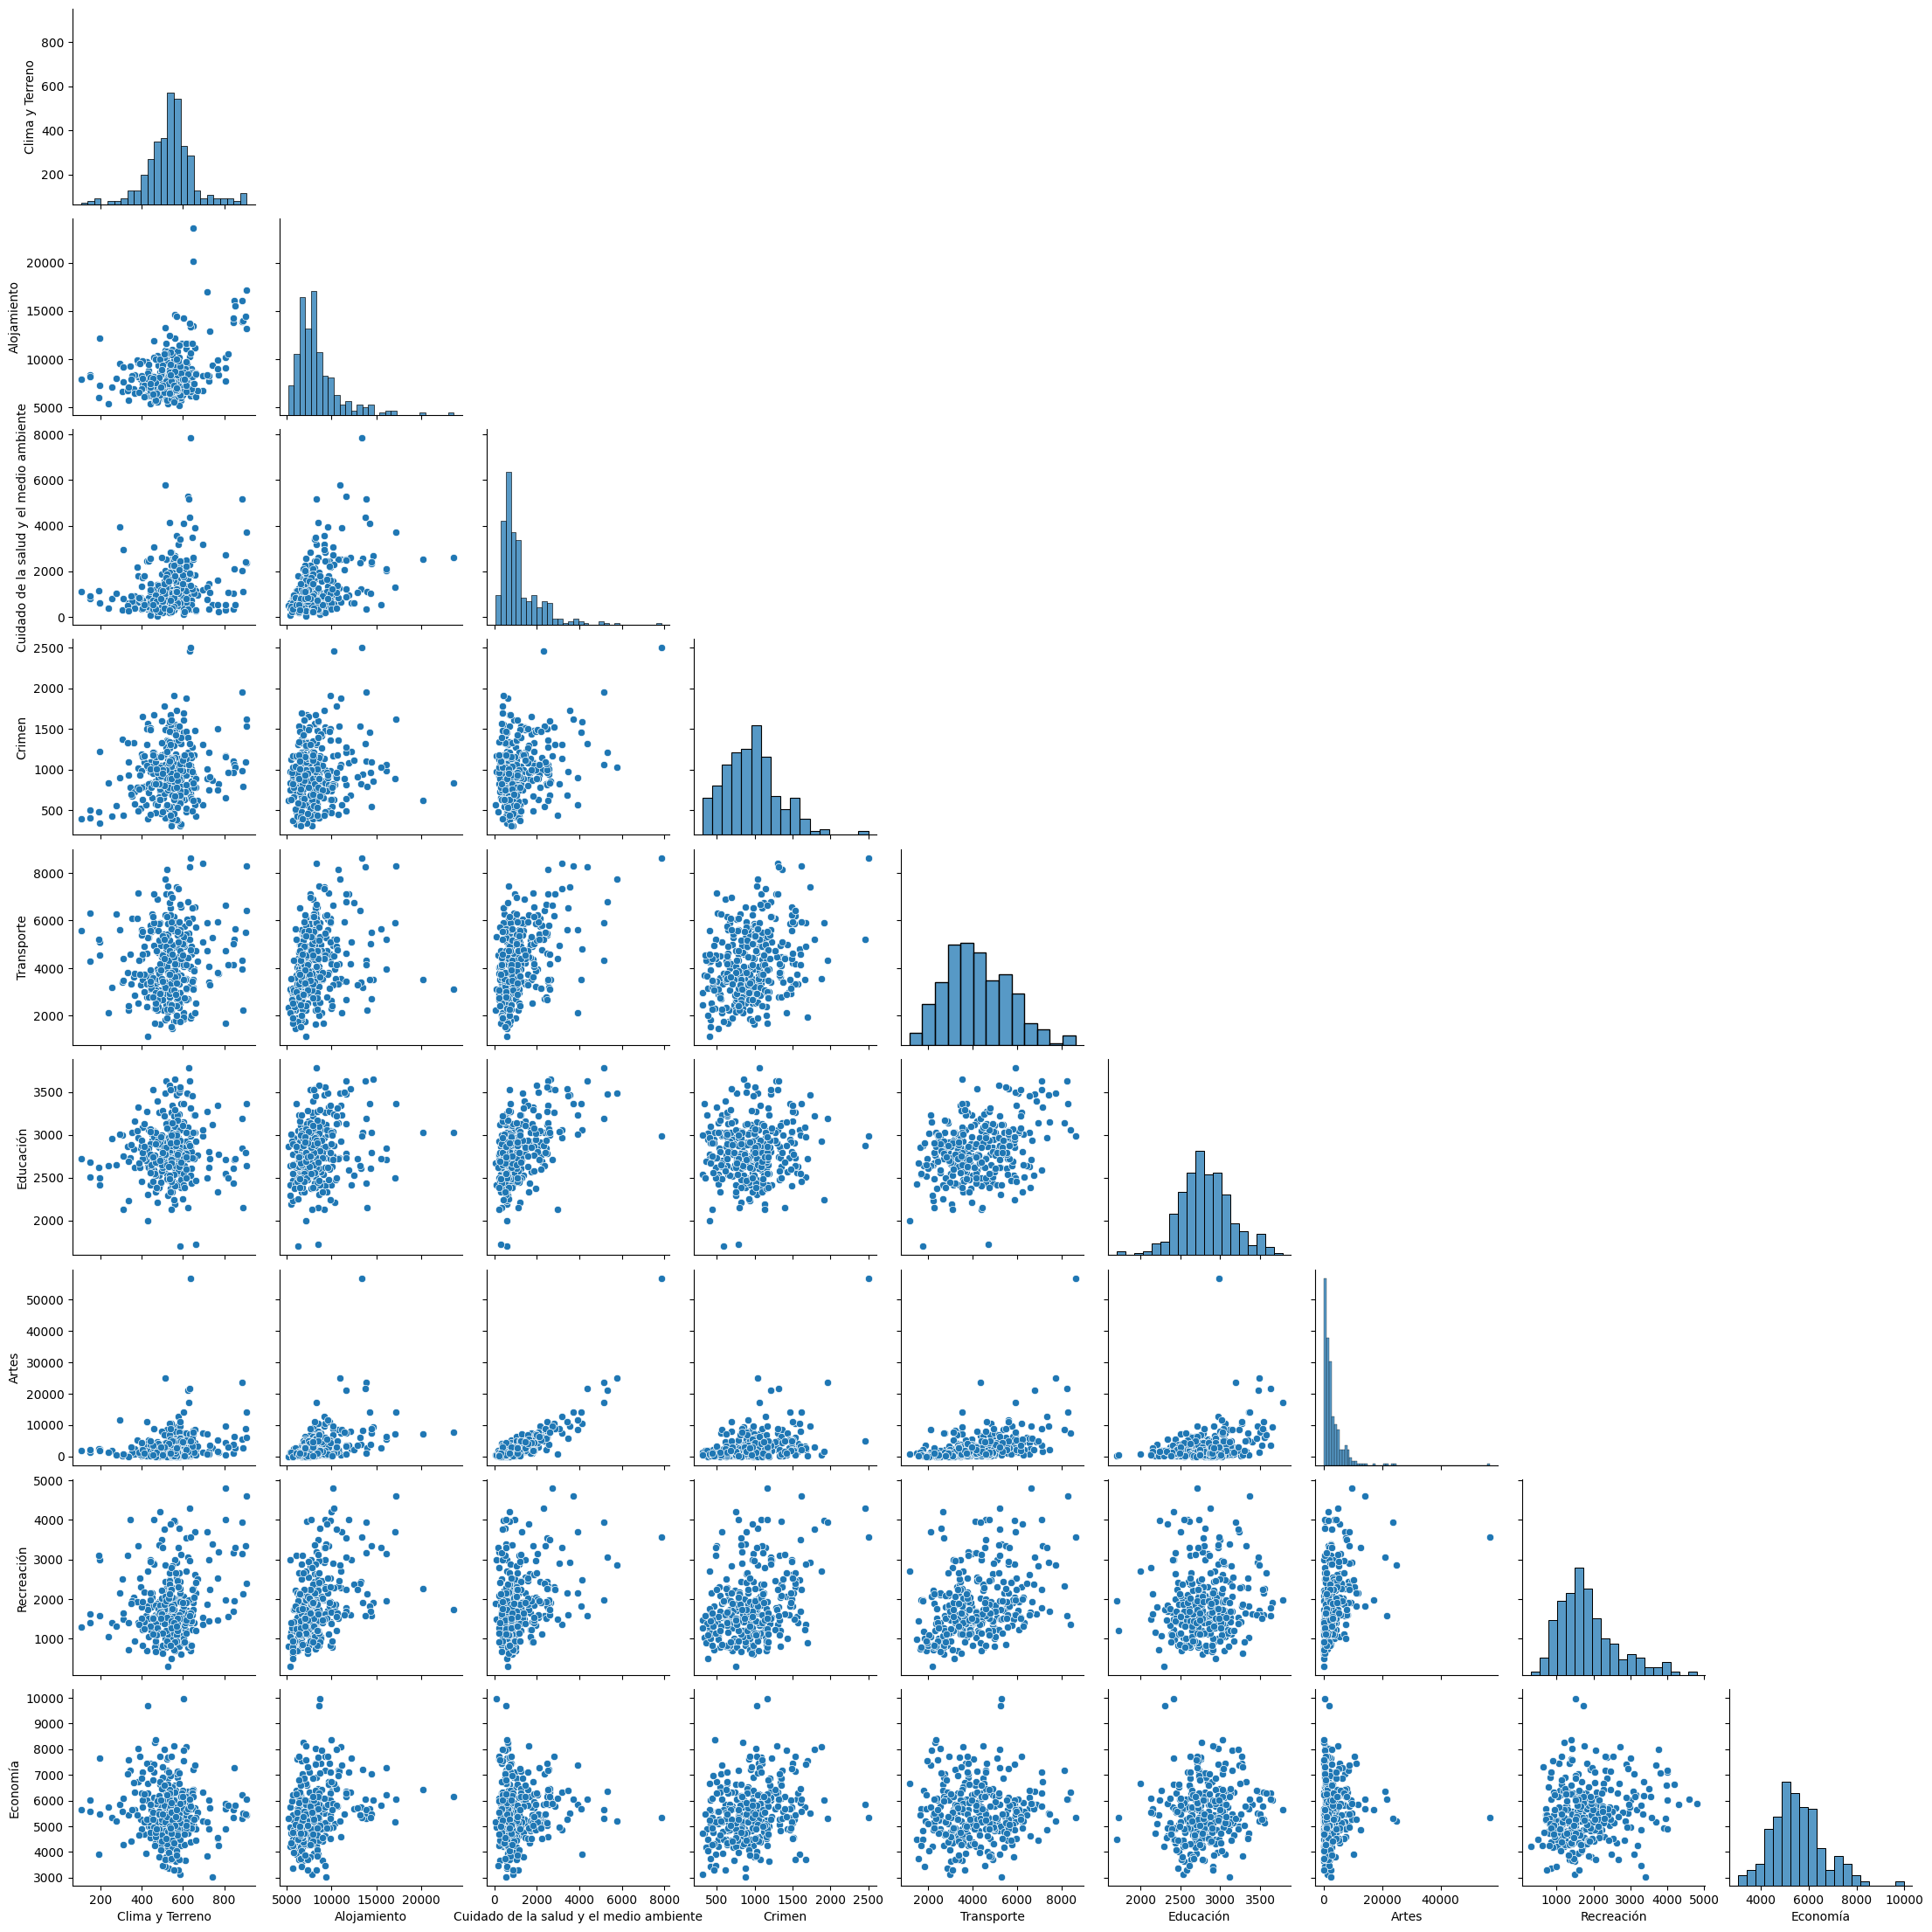

In [ ]:
g = sns.pairplot(df)
for i, j in zip(*plt.np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

**Procedimiento**
1. Se usa `describe` para obtener un resumen de las estadísticas. Luego se aplica `T` para transponer las estadísticas y tener una mejor lectura.
2. Se usa `corr` para calcular la matriz de correlación. Esta correlación se guarda en una variable `correlation_matrix`
3. A través de la librería `seaborn` se grafica un heatmap para identificar visualmente las correlaciones.
4. Usando `np.math.comb` podemos conocer el número de gráficos de dispersión bivariados.
5. Se usa `seaborn` para graficar los diagramas de dispersión mostrando únicamente el triángulo inferior.

**Análisis**
1. Se necesitan un total de `36` gráficos de dispersión bivariados.
2. `Artes` y `Cuidado de la salud y el medio ambiente` tienen una correlación de `0.87`.
3. `Economía` y `Clima y Terreno` tienen una correlación de `-0.1`.

**Conclusiones**
1. `Artes` y `Cuidado de la salud y el medio ambiente` están altamente correlacionados.
2. `Economía` está negativamente correlacionado con `Clima y Terreno`.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso.

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

In [ ]:
# Estandarizar los datos
mu = df.mean()
sigma = df.std()
df_norm = (df - mu)/sigma
df_norm.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,-0.899926,-0.945899,-0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,-0.087437,0.468854,-0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,-0.422410,-0.566039,0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,-0.183862,0.244527,-0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,0.019470,0.665264,1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


In [ ]:
S = df_norm.cov()
S

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Clima y Terreno,1.000000,0.386291,0.213303,0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
Alojamiento,0.386291,1.000000,0.453010,0.134222,0.271922,0.197934,0.448568,0.422288,0.269433
Cuidado de la salud y el medio ambiente,0.213303,0.453010,1.000000,0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crimen,0.192387,0.134222,0.304659,1.000000,0.286578,0.074416,0.389483,0.344627,0.259995
Transporte,0.079120,0.271922,0.470317,0.286578,1.000000,0.335992,0.464806,0.364716,0.059247
Educación,0.064520,0.197934,0.490234,0.074416,0.335992,1.000000,0.373279,0.077807,0.119700
Artes,0.226974,0.448568,0.865796,0.389483,0.464806,0.373279,1.000000,0.378659,0.075673
Recreación,0.213509,0.422288,0.325397,0.344627,0.364716,0.077807,0.378659,1.000000,0.173531
Economía,-0.100083,0.269433,0.069271,0.259995,0.059247,0.119700,0.075673,0.173531,1.000000


In [ ]:
eig_val, eig_vec = np.linalg.eig(S)
print(eig_val)
print(max(eig_val))

[3.4082918  1.21397617 1.14147915 0.92091782 0.75328488 0.6305619
 0.49304772 0.31803849 0.12040208]
3.4082918006352414


In [ ]:
eig_vec=eig_vec.T
eig_vec[[0]]

array([[0.20641395, 0.35652161, 0.46021465, 0.28129838, 0.35115078,
        0.27529264, 0.46305449, 0.32788791, 0.13541225]])

In [ ]:
model = pca(n_components=9)
df_pca = model.fit_transform(df_norm, verbose=False)

In [ ]:
df_pca['loadings']

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
PC1,0.206414,0.356522,0.460215,0.281298,0.351151,0.275293,0.463054,0.327888,0.135412
PC2,0.217835,0.250624,-0.299465,0.355342,-0.179604,-0.483382,-0.194790,0.384475,0.471283
PC3,0.689956,0.208172,0.007325,-0.185105,-0.146376,-0.229703,0.026484,0.050853,-0.607314
PC4,0.137321,0.511829,0.014702,-0.539050,-0.302904,0.335411,-0.101080,-0.189801,0.421770
PC5,-0.369150,0.233488,-0.103241,-0.523940,0.404348,-0.208819,-0.105098,0.529541,-0.159620
PC6,-0.374605,0.141640,0.373848,-0.080923,-0.467592,-0.502170,0.461881,-0.089916,-0.032608
PC7,-0.084706,-0.230639,0.013868,0.018606,-0.583391,0.426182,-0.021525,0.627878,-0.149741
PC8,-0.362308,0.613855,-0.185676,0.430025,-0.093599,0.188668,-0.203990,-0.150596,-0.404809
PC9,0.001391,0.013600,-0.716355,-0.058608,0.003629,0.110840,0.685758,-0.025506,0.000438


In [ ]:
df_pca['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
"Abilene,TX",-1.040180,0.893769,-1.436654,0.509834,-0.565136,-0.497854,-0.423751,-1.001776,0.347404
"Akron,OH",0.439814,0.075066,1.154717,-1.112207,0.996884,0.628547,-0.011895,-0.418746,-0.121685
"Albany,GA",-1.875539,0.069792,-0.073347,-0.046232,-0.679524,0.714097,-0.239494,0.441897,-0.094201
"Albany-Schenectady-Troy,NY",0.910741,-1.817582,-1.096147,0.573581,0.769080,-1.271237,-0.458716,-0.371496,0.317277
"Albuquerque,NM",2.149248,0.328858,-0.019738,-1.031502,-0.238550,-1.284224,-0.154544,-0.148264,-0.307153
...,...,...,...,...,...,...,...,...,...
"Worcester,MA",-0.140983,-1.642143,0.230877,1.224202,-0.670711,-0.348114,0.159054,0.309008,-0.400504
"Yakima,WA",-1.132624,0.739830,0.319330,-1.115428,0.099816,-0.027811,0.257803,-0.062502,0.144835
"York,PA",-1.708201,-0.904933,0.657982,1.340779,-0.311793,0.344883,0.170877,0.136739,0.165862
"Youngstown-Warren,OH",-0.765311,-1.075326,0.962153,-0.435825,-0.575757,-0.027063,0.403151,0.390747,0.057641


In [ ]:
df_pca['explained_var']

array([0.37869909, 0.51358533, 0.64041635, 0.74274055, 0.82643887,
       0.8965013 , 0.95128438, 0.98662199, 1.        ])

In [ ]:
df_pca['variance_ratio']

array([0.37869909, 0.13488624, 0.12683102, 0.1023242 , 0.08369832,
       0.07006243, 0.05478308, 0.03533761, 0.01337801])

[scatterd] >INFO> Hex [[0, 0, 0]] should be of type string
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


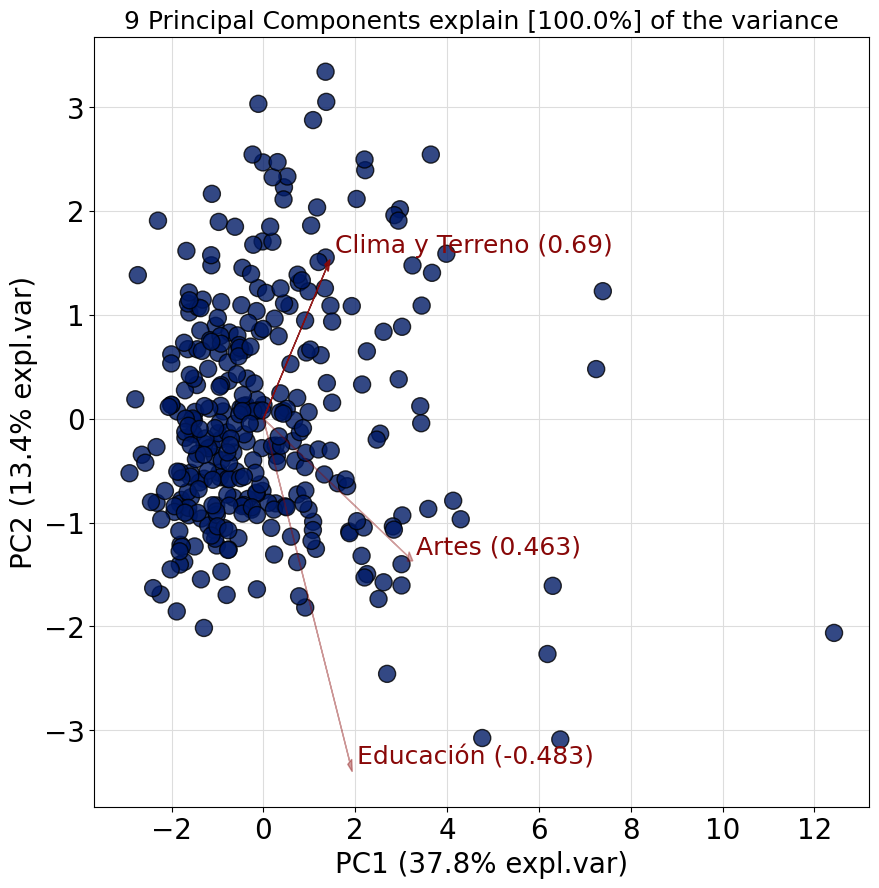

In [ ]:
fig, ax = model.biplot(n_feat=3, legend=False, figsize=(10,10))

**Procedimiento**

**Análisis**

**Conclusiones**
1. El primer componente principal es:
\begin{align}
f_1 =  0.20 \times \text{Clima y Terreno} + 0.35 \times Alojamiento + 0.46 \times \text{Cuidado de la salud y el medio ambiente} + 0.28 \times Crimen + 0.35 \times Transporte + 0.27 \times Educación + 0.46 \times Artes + 0.32 \times Recreación + 0.13 \times Economía
\end{align}

In [ ]:
# Utilice este espacio para escribir el código.
prop_var_explicada = eig_val/sum(eig_val)
prop_var_explicada

array([0.37869909, 0.13488624, 0.12683102, 0.1023242 , 0.08369832,
       0.07006243, 0.05478308, 0.03533761, 0.01337801])

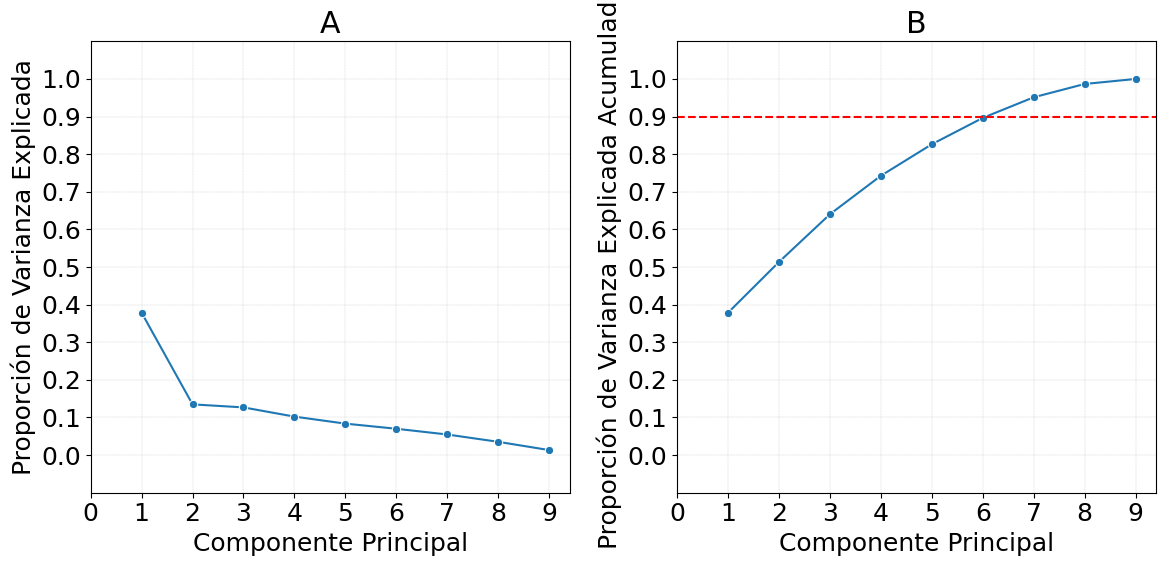

In [ ]:
explained_variance = np.cumsum(eig_val) / np.sum(eig_val)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=np.arange(1, len(prop_var_explicada) + 1), y=prop_var_explicada, marker='o')

plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('A')
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.ylim(-0.1, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 10, 1))

plt.subplot(1, 2, 2)

sns.lineplot(x=np.arange(1, len(explained_variance) + 1), y=explained_variance, marker='o')

plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.title('B')
plt.grid(True, which='both', linestyle='--', linewidth=0.2)
plt.axhline(y=0.9, color='r', linestyle='--', label='Umbral')
plt.ylim(-0.1, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 10, 1))


plt.tight_layout()

plt.show()

**Procedimiento**

**Análisis**

**Conclusiones**

### 4.  Interpretación de los componentes principales.

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas, tablas, etc.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).